In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('Auction_master_train.csv', encoding="utf-8")

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. 결측값이 있는 열 제거

리 주소, 번지수, 상세설명, 도로명 주소 번지수 열에 결측값이 존재하는 것을 발견할 수 있음.

In [3]:
df.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [4]:
df.drop(['addr_li', 'addr_bunji1','addr_bunji2', 'Specific', 'road_bunji1', 'road_bunji2'], axis='columns', inplace=True)
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


# 2. 상관관계 Heatmap

낙찰가에 최저매각가격, 총감정가, 총건물경매면적, 총건물면적, 총토지경매면적, 총토지실면적 등이 주요한 영향을 미치는 것을 발견할 수 있음. 

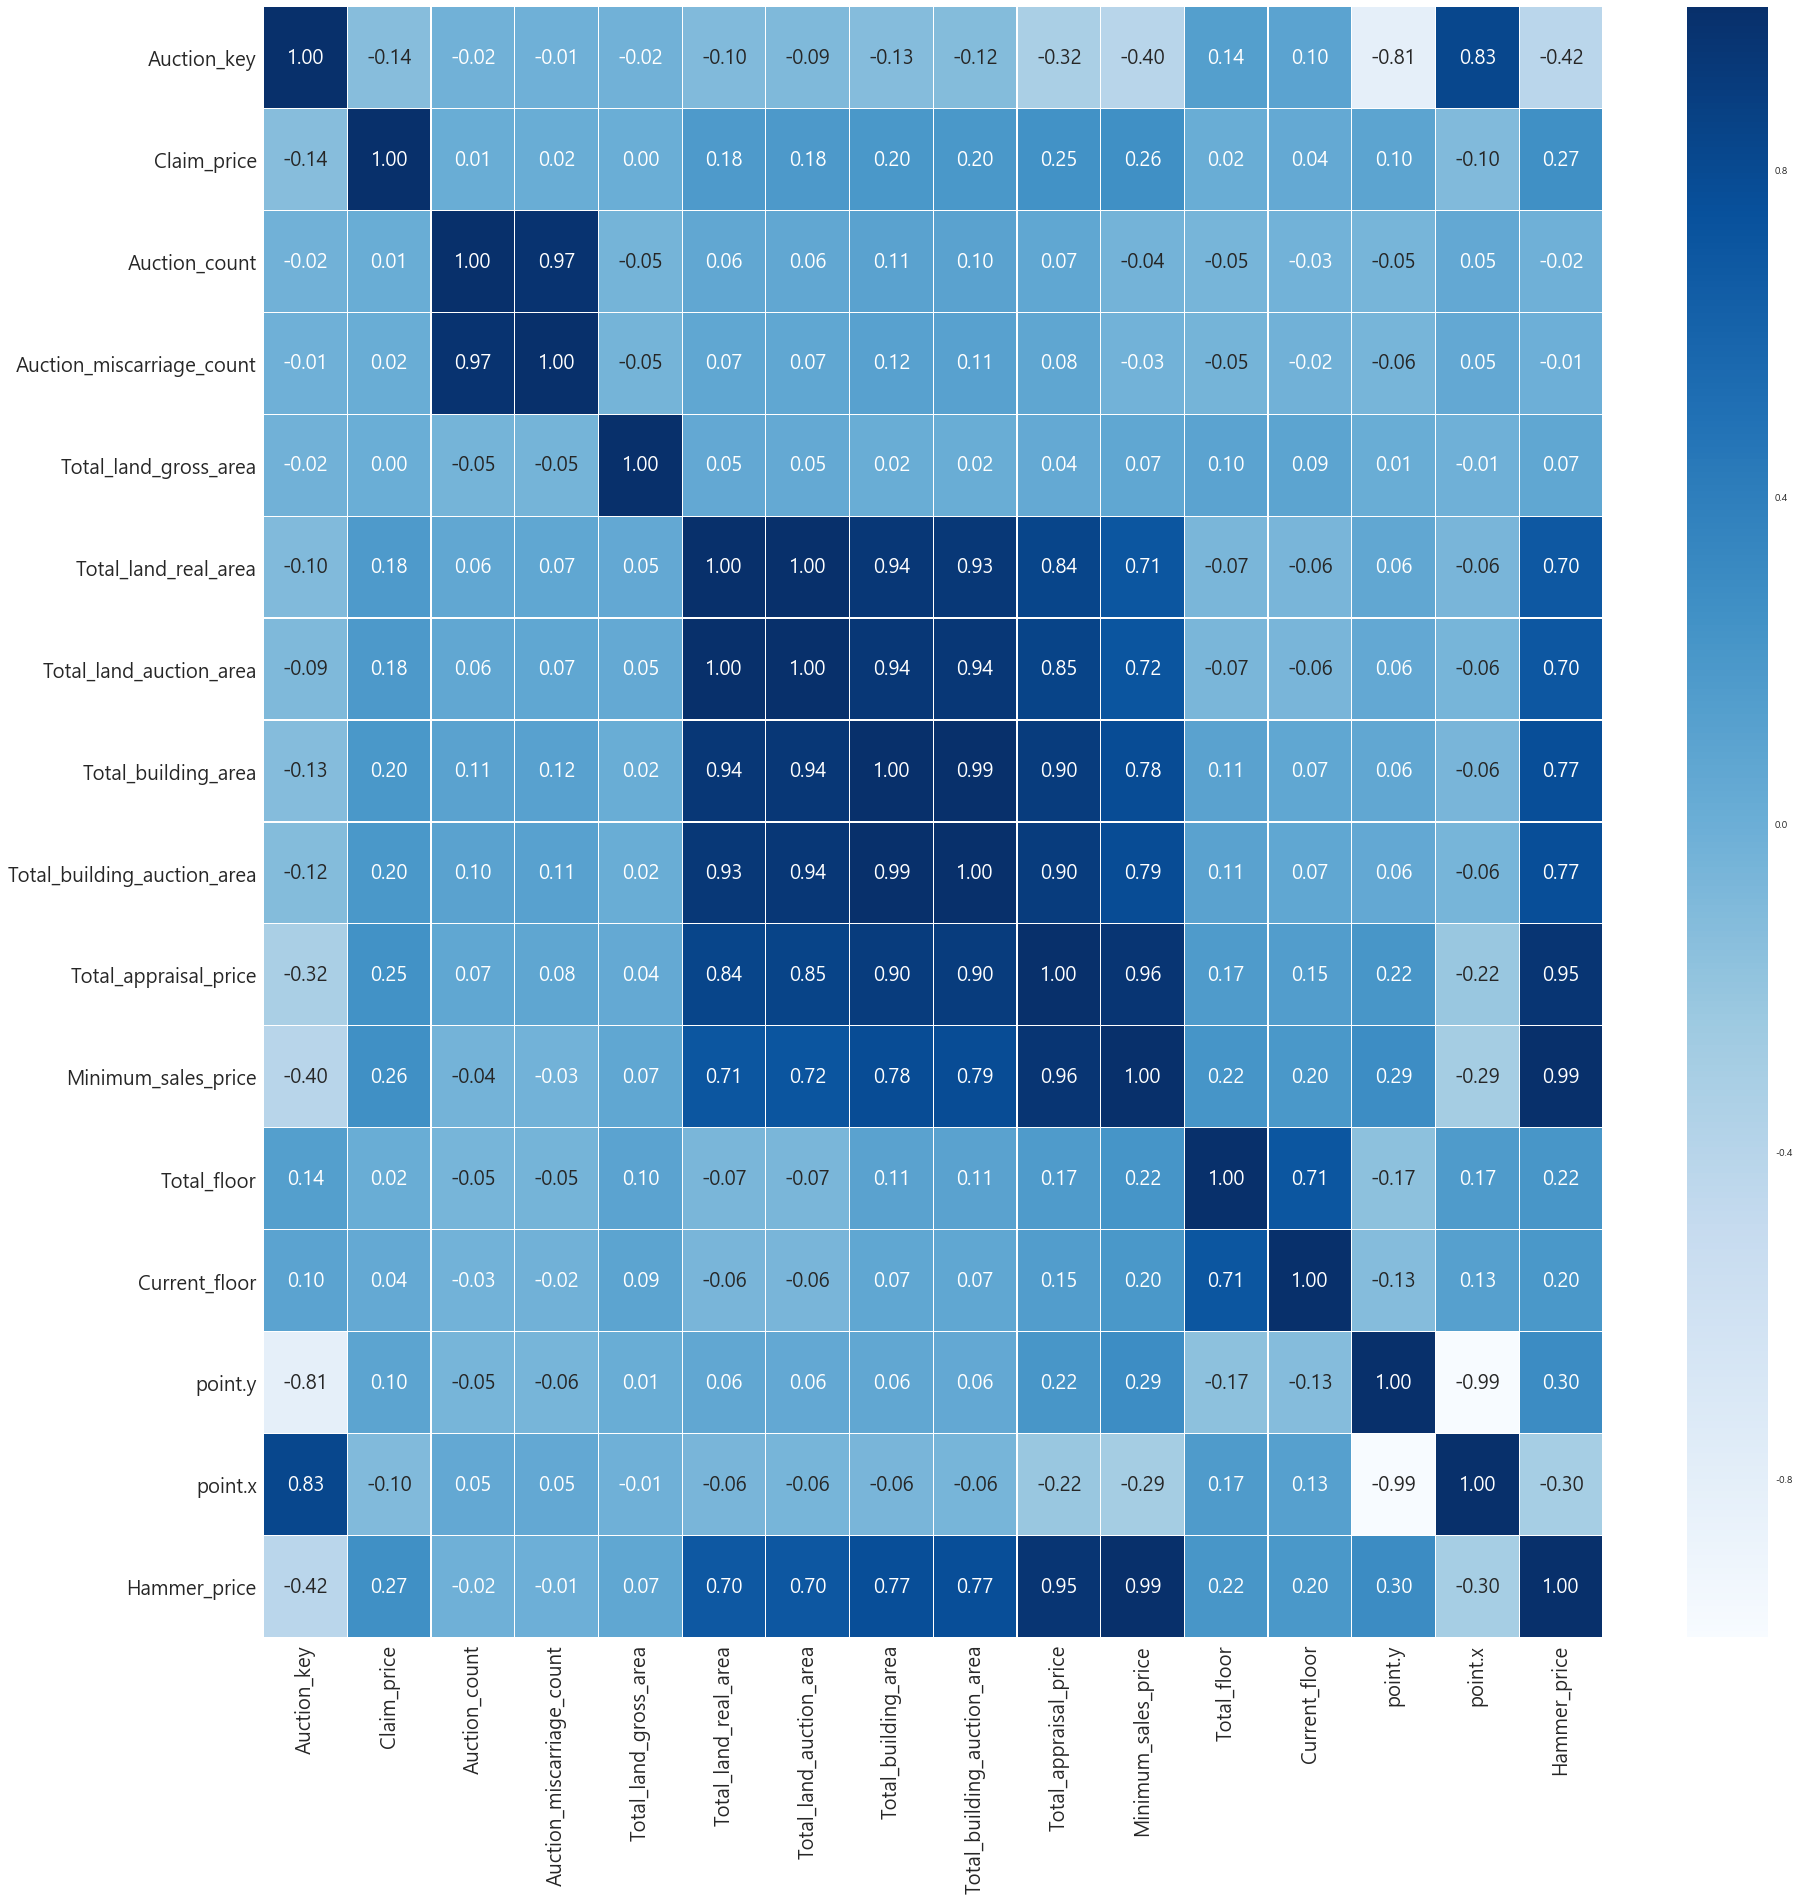

In [5]:
df.corr()
g = sns.heatmap(data = df.corr(), annot=True, annot_kws={'fontsize':20}, fmt = '.2f', linewidths=.2, cmap='Blues')
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# 3. 연속형 변수 별 히스토그램

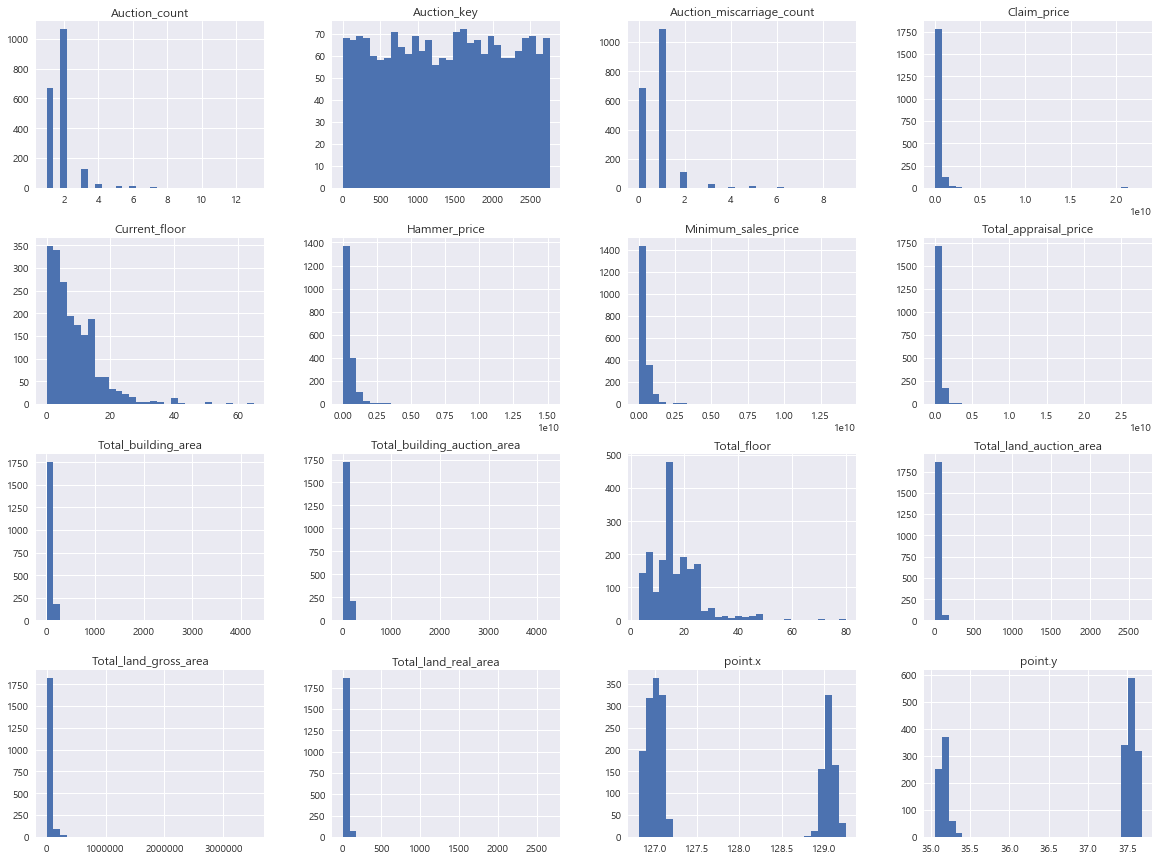

In [6]:
df.hist(bins=30,figsize=(20,15))
plt.show()


# 4. 변수 별 시각화

### 1) 지역별 경매 횟수

서울과 부산 각각의 지역의 경매 횟수가 어떤 비율을 가지고 있는지를 나타내 보았음.

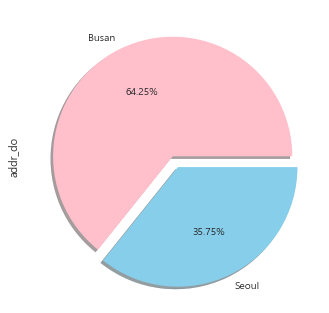

In [7]:
# 1) 지역별 경매 횟수 그래프
addr_do = df['addr_do'].value_counts()
addr_do.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True, labels =['Busan', "Seoul"],colors =['pink','skyblue']) 

### 2) 지역별 총 건물면적에 따른 낙찰가

총 건물면적에 따라 낙찰가가 어떻게 결정되는지를 lmplot으로 나타내었음.  
서울의 경매시세가 부산보다 높게 형성되어 있음을 발견할 수 있음.

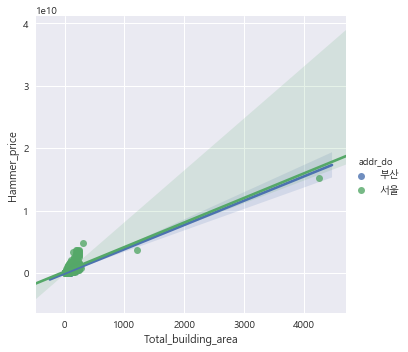

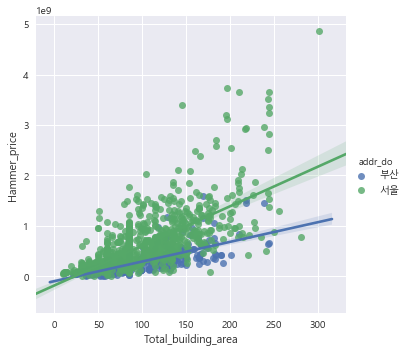

In [8]:
# 2) 지역별 총 건물면적-낙찰가 그래프
sns.lmplot(x='Total_building_area',y='Hammer_price', hue='addr_do',data=df)
df2 = df.loc[df['Total_building_area']<1000] #빌딩 면적 아웃라이어 제거
sns.lmplot(x='Total_building_area',y='Hammer_price', hue='addr_do',data=df2)

### 3) 지역별 경매구분

지역별로 임의/강제 경매구분의 횟수를 Count Plot으로 나타내었음.

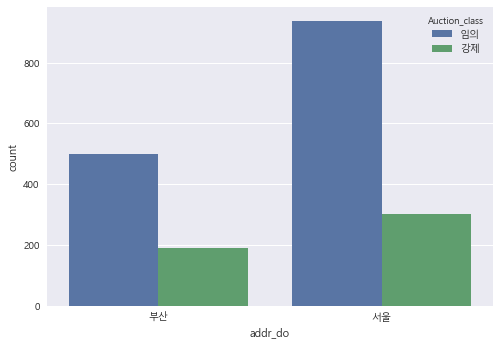

In [9]:
# 3) 지역별 경매구분
sns.countplot("addr_do", hue='Auction_class', data=df2)

### 4) 경매구분별 총 건물면적에 따른 낙찰가

경매구분에 따른 낙찰가의 차이가 있는지를 lmplot으로 나타내었음.
임의가 강제보다 낙찰가가 높게 형성되어 있음.

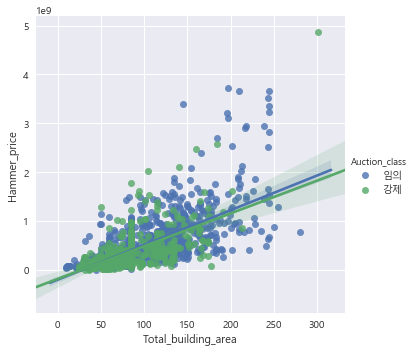

In [10]:
# 4) 경매구분별 총 건물면적에 따른 낙찰가
sns.lmplot(x='Total_building_area',y='Hammer_price',hue='Auction_class',data=df2)

### 5) 건물용도별 총 건물면적에 따른 낙찰가

건물용도에 따른 낙찰가의 차이가 있는지를 lmplot으로 나타내었음.
적은 평수에서는 아파트가, 넓은 평수에서는 주상복합이 더 경매가가 높음.

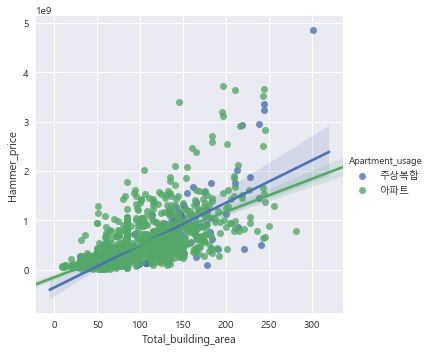

In [11]:
# 5) 건물용도별 총 건물면적에 따른 낙찰가
sns.lmplot(x='Total_building_area',y='Hammer_price',hue='Apartment_usage',data=df2)

# 5. 피쳐 선정

### 1) 경매 분기
최종경매일(Final_auction_date)를 분기로 나눈다. 즉 16년 1분기, 2분기 등등으로 나눈다.
분기별 경매 시세의 변동을 파악하기 위함이다.

In [12]:
Final_acution_date_quarter = []
for row in df["Final_auction_date"] :
    if int(row[0:4]) == 2016 :
        if int(row[5:7]) <= 3 :
            Final_acution_date_quarter.append("16-1")
        elif int(row[5:7]) <= 6 :
            Final_acution_date_quarter.append("16-2")
        elif int(row[5:7]) <= 9 :
            Final_acution_date_quarter.append("16-3")
        elif int(row[5:7]) <= 12 :
            Final_acution_date_quarter.append("16-4")
    elif int(row[0:4]) == 2017 :
        if int(row[5:7]) <= 3 :
            Final_acution_date_quarter.append("17-1")
        elif int(row[5:7]) <= 6 :
            Final_acution_date_quarter.append("17-2")
        elif int(row[5:7]) <= 9 :
            Final_acution_date_quarter.append("17-3")
        elif int(row[5:7]) <= 12 :
            Final_acution_date_quarter.append("17-4")
    elif int(row[0:4]) == 2018 :
        if int(row[5:7]) <= 3 :
            Final_acution_date_quarter.append("18-1")
        elif int(row[5:7]) <=6 :
            Final_acution_date_quarter.append("18-2")
        elif int(row[5:7]) <=9 :
            Final_acution_date_quarter.append("18-3")
        elif int(row[5:7]) <=12 :
            Final_acution_date_quarter.append("18-4")
df["Final_acution_date_quarter"] = Final_acution_date_quarter

In [13]:
df["Final_acution_date_quarter"]

0       18-1
1       17-1
2       17-4
3       17-4
4       16-3
        ... 
1928    17-2
1929    17-1
1930    18-1
1931    16-4
1932    16-2
Name: Final_acution_date_quarter, Length: 1933, dtype: object

### 2) 지역별 평당 시세
addr_si의 평당 시세를 알기 위해 낙찰가/총경매건물면적를 시군구 별로 확인한다.

In [22]:
addr_si_dict = {}
i = 1
#사전 초기화 {si1 : [평당 경매가1, 평당경매가2], si2 :[...], ....}
for idx, member in df.iterrows():
    si = member["addr_si"]
    addr_si_dict[si] = []

#경매가 추가
for idx, member in df.iterrows():
    si = member["addr_si"]
    area = member["Total_building_auction_area"]
    price = member["Hammer_price"]
    addr_si_dict[si].append(price/area)
    
#평균 경매가 산출
for sii in addr_si_dict :
    sii_avg_price = sum(addr_si_dict[sii], 0)/len(addr_si_dict[sii])
    addr_si_dict[sii] = sii_avg_price

addr_si_dict

addr_si_avg = []
for row in df["addr_si"] :
    addr_si_avg.append(addr_si_dict[row])
df["addr_si_avg"] = addr_si_avg
df["addr_si_avg"]

0       3.556895e+06
1       3.556895e+06
2       2.331404e+06
3       2.710112e+06
4       2.008038e+06
            ...     
1928    4.008161e+06
1929    4.730168e+06
1930    4.469163e+06
1931    4.008161e+06
1932    4.828723e+06
Name: addr_si_avg, Length: 1933, dtype: float64

### 3) sqrt(최저매각가격/총감정가, 유찰횟수)
경매를 진행하는 법원별로 유찰시 최저매각가격을 선정하는 비율이 다르다. 따라서 그 비율을 산정하기 위한 피쳐다. 기본 비율은 0.8이다.

In [15]:
min_price_rate = []
j = 1

for idx, member in df.iterrows():
    if member["Auction_miscarriage_count"] == 0 :
        min_price_rate.append(rate) == 0.8
        continue
    rate = (float(member["Minimum_sales_price"])/float(member["Total_appraisal_price"])) ** (1.0/float(member["Auction_miscarriage_count"]))
    min_price_rate.append(rate)
df["min_price_rate"] = min_price_rate
df["min_price_rate"]

0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1928    0.8
1929    0.8
1930    0.8
1931    0.8
1932    0.8
Name: min_price_rate, Length: 1933, dtype: float64

### 4) 현재층수/총층수
일정 층 수 이상 주상복합건물의 경우 최상층이면 펜트하우스일 가능성이 높다. 따라서 이에 대한 프리미엄이 붙을 수 있다.  
또한 일정 층 수 이상 아파트에서 고층은 시세가 더 비싸다. 그렇지만 최상층은 가격이 비교적 낮다.(15층 아파트의 경우 10~13층이 프리미엄)  
따라서 건물용도에 따라 현재층수/총층수가 100%일 때, 80%일 때 등으로 나누어 시세에 미칠 영향을 고려할 수 있다.

In [16]:
floor_rate = []
for idx, member in df.iterrows():
    floor_rate.append(member["Current_floor"]/member["Total_floor"])
    
df["floor_rate"] = floor_rate
df["floor_rate"]

0       0.111111
1       0.728571
2       0.933333
3       0.550000
4       1.000000
          ...   
1928    0.714286
1929    1.000000
1930    0.593750
1931    0.733333
1932    0.318182
Name: floor_rate, Length: 1933, dtype: float64

### 5) 용도지구
주소지에 따라 해당 건물과 건물주변의 용도지구가 다르다. 주거지역/상업지역/공업지역 등으로 구분됨에 따라 각각의 시세가 다르게 선정된다.
참고 : http://www.ohmynews.com/NWS_Web/View/at_pg.aspx?CNTN_CD=A0000338958

(공간정보 오픈플랫폼 오픈 api에서 경매건에 대한 각 주소를 검색하는 api를 사용하면 될 듯 합니다만.... 따로 공부할게요..
http://www.vworld.kr/dev/v4dv_2ddataguide_s002.do?svcIde=uq111)

### 6) 공시지가
국토교통부에서 지정하는 동 단위별 공시지가를 통해 해당 지역의 부동산 시세를 가늠할 수 있다.

### 7) 금리
부동산 가격은 시중금리의 영향을 받는다. 시중금리가 낮을수록 부동산의 투자가치는 상승한다.
참고 : http://www.reacademy.org/rboard/data/krea2_new/72_3.pdf  
시중금리 추이 : http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1073

In [24]:
#기준금리 (2016-1분기 ~ 2018-4분기)
interst_rate = [1.50, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.50, 1.50 , 1.50, 1.50, 1.75]

inter_rate_quarter = []
for row in df["Final_acution_date_quarter"] :
    if row == '16-1' :
        inter_rate_quarter.append(interst_rate[0])
    elif row == '16-2' :
        inter_rate_quarter.append(interst_rate[1])
    elif row == '16-3' :
        inter_rate_quarter.append(interst_rate[2])     
    elif row == '16-4' :
        inter_rate_quarter.append(interst_rate[3])
    elif row == '17-1' :
        inter_rate_quarter.append(interst_rate[4])
    elif row == '17-2' :
        inter_rate_quarter.append(interst_rate[5])
    elif row == '17-3' :
        inter_rate_quarter.append(interst_rate[6])
    elif row == '17-4' :
        inter_rate_quarter.append(interst_rate[7])
    elif row == '18-1' :
        inter_rate_quarter.append(interst_rate[8])
    elif row == '18-2' :
        inter_rate_quarter.append(interst_rate[9])
    elif row == '18-3' :
        inter_rate_quarter.append(interst_rate[10])
    elif row == '18-4' :
        inter_rate_quarter.append(interst_rate[11])
        
df["inter_rate_quarter"] = inter_rate_quarter
df["inter_rate_quarter"]

0       1.50
1       1.25
2       1.50
3       1.50
4       1.25
        ... 
1928    1.25
1929    1.25
1930    1.50
1931    1.25
1932    1.25
Name: inter_rate_quarter, Length: 1933, dtype: float64

### 8) 낙찰가율 = (낙찰가 ÷ 감정가)
건물 용도별로 낙찰가율이 다르다. 일반적으로 소형아파트는 경쟁률이 높아 낙찰가율이 높게 형성되는 경향이 있으며, 낙찰가율의 변동에 따라 부동산 시장의 경기를 유추할 수 있다.
참고 : http://www.ndsl.kr/ndsl/search/detail/article/articleSearchResultDetail.do?cn=DIKO0013232489

In [18]:
hammer_price_rate = []
for idx, member in df.iterrows():
    hammer_price_rate.append(member["Hammer_price"]/member["Total_appraisal_price"])
    
df["hammer_price_rate"] = hammer_price_rate
df["hammer_price_rate"]

0       0.909091
1       0.905769
2       0.784874
3       0.890773
4       0.933294
          ...   
1928    1.003741
1929    0.947653
1930    0.870817
1931    0.990172
1932    0.914680
Name: hammer_price_rate, Length: 1933, dtype: float64

### 9) 낙찰일-준공일자
오래된 건물일수록 가격이 하락할 가능성이 높다. 따라서 낙찰일과 준공일자의 차이가 가격에 영향을 미칠 것이다.

In [19]:
built_date = []
for idx, member in df.iterrows():
    preserve_regist_date = datetime(int(member["Preserve_regist_date"][0:4]), int(member["Preserve_regist_date"][5:7]), int(member["Preserve_regist_date"][8:10]))
    final_auction_date = datetime(int(member["Final_auction_date"][0:4]), int(member["Final_auction_date"][5:7]), int(member["Final_auction_date"][8:10]))
   
    built_date.append(final_auction_date-preserve_regist_date)
    
df["built_date"] = built_date
df["built_date"]

0       3171 days, 0:00:00
1       1875 days, 0:00:00
2       9205 days, 0:00:00
3       5956 days, 0:00:00
4       5363 days, 0:00:00
               ...        
1928    9060 days, 0:00:00
1929    6131 days, 0:00:00
1930    2228 days, 0:00:00
1931    5121 days, 0:00:00
1932     919 days, 0:00:00
Name: built_date, Length: 1933, dtype: object

### 10) 건폐율/용적률/연면적
건물별로 건폐율/용적률/연면적이 다르며 부동산 시세에 영향을 미치는 변수이다.
참고 : http://kras.seoul.go.kr/land_info/info/baseInfo/baseInfo.do

In [20]:
# 엑셀 파일 자료와 건폐율/용적률/연면적이 맞지 않아서 5), 6)과 같이 주소로 하나씩 검색해야 함...